In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(initial, test_function_no):
    x = initial
    
    if test_function_no == 1:
        return 10 * -np.cos(2 * (x[0]**2 + x[1]**2)**0.5) * np.exp(-0.5 * ((x[0] + 1)**2 + (x[1] - 1)**2)**0.5) + 5.1
    elif test_function_no == 2:
        return -np.sum(peaks(x[0], x[1])) + 8.5
    elif test_function_no == 3:
        return -1 * (0.2 + x[0]**2 + x[1]**2 - 0.1 * np.cos(6 * np.pi * x[0]) - 0.1 * np.cos(6 * np.pi * x[1]))
    elif test_function_no == 4:
        return -1 * np.sum(np.square(x))

def get_neighbours(a, step_size, ub, lb, test_function_no):
    n_var = len(a['position'])
    neighbours = []
    
    for idx in range(1, 5):
        step_vector = np.zeros(2)
        
        if idx == 1:
            step_vector[0] = step_size[0]
        elif idx == 2:
            step_vector[1] = step_size[1]
        elif idx == 3:
            step_vector[0] = -step_size[0]
        elif idx == 4:
            step_vector[1] = -step_size[1]
        
        neighbour_position = a['position'] + step_vector
        neighbour_position = np.maximum(lb, np.minimum(ub, neighbour_position))
        
        neighbour = {'position': neighbour_position, 'cost': objective_function(neighbour_position, test_function_no)}
        neighbours.append(neighbour)
    
    return neighbours




In [3]:

initial = np.array([0.8, -0.5])
test_function_no = 3
cost_initial = objective_function(initial, test_function_no)

ub = np.array([1, 1])
lb = np.array([-1, -1])

step_size = np.array([0.05, 0.05])

n_var = len(initial)

A = {'position': initial, 'cost': cost_initial}

# Simulated annealing control parameters
T0 = 1
T = T0  # Temperature
alpha = 0.99  # Cooling factor
max_iter = 500

T_hist = []
P_hist = []

trajectory = [{'position': np.zeros(n_var), 'cost': 0} for _ in range(max_iter)]

for iteration in range(1, max_iter + 1):
    neighbours = get_neighbours(A, step_size, ub, lb, test_function_no)
    
    trajectory[iteration - 1]['position'] = A['position']
    trajectory[iteration - 1]['cost'] = A['cost']
    
    idx = np.random.randint(1, 5)
    B = neighbours[idx - 1]
    
    delta = A['cost'] - B['cost']
    
    if delta < 0:  # Uphill movement (good move)
        A = B
    else:
        P = np.exp(-delta / T)
        P_hist.append(P)
        r = np.random.rand()
        
        if r < P:
            A = B
    
    T_hist.append(T)
    T *= alpha

print('Best solution obtained by Simulated Annealing:',A)
print("trajectory")
for point in trajectory:
    print(point)



Best solution obtained by Simulated Annealing: {'position': array([ 3.0000000e-01, -6.9388939e-17]), 'cost': -0.10909830056250533}
trajectory
{'position': array([ 0.8, -0.5]), 'cost': -1.2709016994374949}
{'position': array([ 0.8 , -0.45]), 'cost': -1.1821802246667419}
{'position': array([ 0.8, -0.5]), 'cost': -1.2709016994374949}
{'position': array([ 0.8 , -0.55]), 'cost': -1.2821802246667422}
{'position': array([ 0.75, -0.55]), 'cost': -1.1237785252292474}
{'position': array([ 0.8 , -0.55]), 'cost': -1.2821802246667422}
{'position': array([ 0.85, -0.55]), 'cost': -1.3788841768587627}
{'position': array([ 0.8 , -0.55]), 'cost': -1.2821802246667422}
{'position': array([ 0.75, -0.55]), 'cost': -1.1237785252292474}
{'position': array([ 0.8 , -0.55]), 'cost': -1.2821802246667422}
{'position': array([ 0.8, -0.5]), 'cost': -1.2709016994374949}
{'position': array([ 0.8 , -0.45]), 'cost': -1.1821802246667419}
{'position': array([ 0.8, -0.4]), 'cost': -1.0499999999999998}
{'position': array([ 

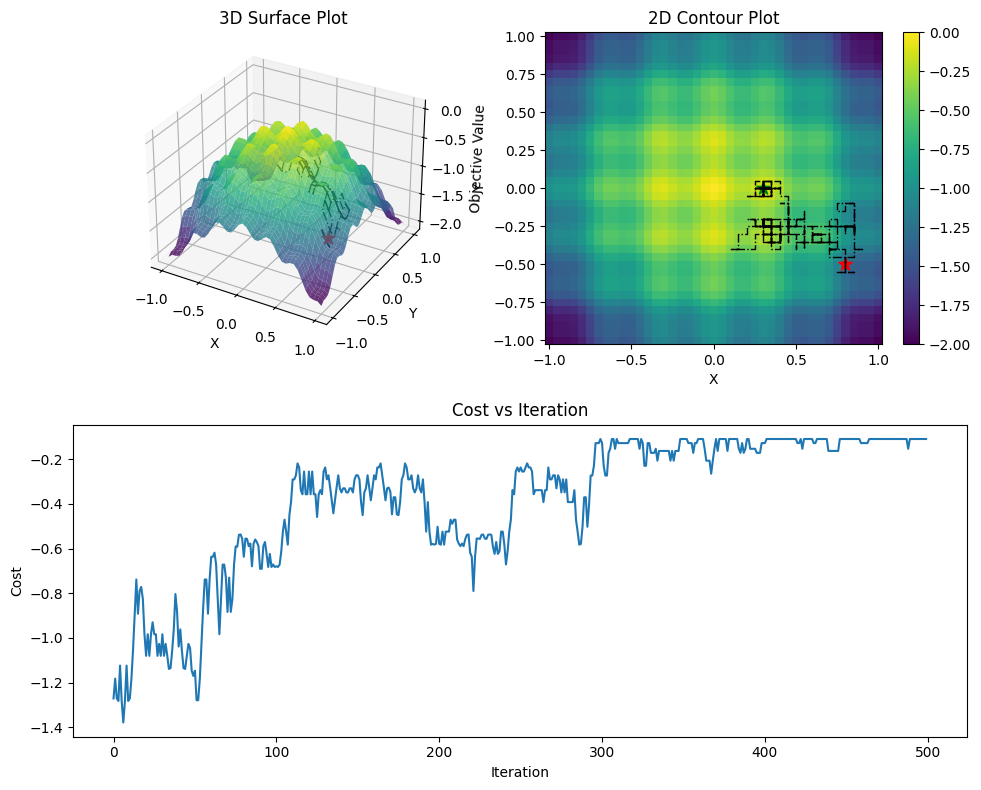

In [4]:
# Plotting
x = np.arange(lb[0], ub[0] + step_size[0], step_size[0])
y = np.arange(lb[1], ub[1] + step_size[1], step_size[1])
x_new, y_new = np.meshgrid(x, y)

z_new = np.zeros_like(x_new)
for i in range(len(x)):
    for j in range(len(y)):
        X = [x_new[i, j], y_new[i, j]]
        z_new[i, j] = objective_function(X, test_function_no)

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(x_new, y_new, z_new, cmap='viridis', alpha=0.8)
ax1.plot([point['position'][0] for point in trajectory], 
         [point['position'][1] for point in trajectory], 
         [point['cost'] for point in trajectory], '-.k', linewidth=1)
ax1.scatter(trajectory[0]['position'][0], trajectory[0]['position'][1], 
            trajectory[0]['cost'], marker='*', color='r', s=100, label='Start')
ax1.scatter(trajectory[-1]['position'][0], trajectory[-1]['position'][1], 
            trajectory[-1]['cost'], marker='*', color='g', s=100, label='End')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Objective Value')
ax1.set_title('3D Surface Plot')

ax2 = fig.add_subplot(2, 2, 2)
c = ax2.pcolormesh(x_new, y_new, z_new, cmap='viridis')
fig.colorbar(c)
ax2.plot([point['position'][0] for point in trajectory], 
         [point['position'][1] for point in trajectory], '-.k', linewidth=1)
ax2.scatter(trajectory[0]['position'][0], trajectory[0]['position'][1], marker='*', color='r', s=100)
ax2.scatter(trajectory[-1]['position'][0], trajectory[-1]['position'][1], marker='*', color='g', s=100)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('2D Contour Plot')

ax3 = fig.add_subplot(2, 2, (3, 4))
ax3.plot([point['cost'] for point in trajectory])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost')
ax3.set_title('Cost vs Iteration')

plt.tight_layout()
plt.show()

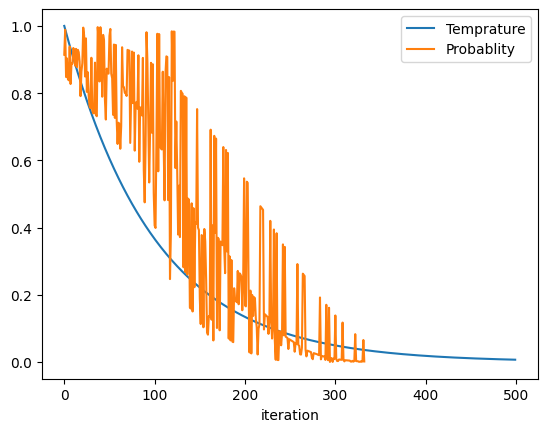

In [10]:
plt.plot(T_hist)
plt.plot(P_hist)
plt.xlabel("iteration")
plt.legend(['Temprature', 'Probablity'])